In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import plotly.plotly as py
import plotly.tools as tls



(359, 5) (359,)
(154, 5) (154,)


Text(0, 0.5, 'Predictions')

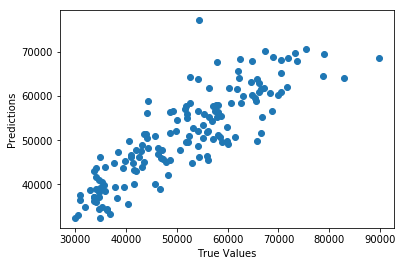

In [101]:
#Split your data into a training and test set
df = pd.read_csv("salary.csv")

df = df.dropna()

y = df["salary"]



X_train, X_test, y_train, y_test = train_test_split(df[['yearsrank' , 'yearsworked' , 'market' , 'yearsabs', 'exprior']], y, test_size=0.3, random_state = 8)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)


plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")



In [104]:
#One-hot encode the variable Field into three dummy variables,

get_processed = pd.get_dummies(df, prefix_sep="HR", columns = ['Field'])

print(get_processed)



          salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
0    53000.00000        0            0          0    1.17       1          0   
1    58000.00000        1            0          0    1.24       1          0   
2    45500.00000        0            0          0    1.21       1          0   
3    35782.00000        0            2          1    0.99       1          0   
4    34731.00000        0            2          2    0.91       1          0   
5    56000.00000        1            0          0    1.19       1          0   
6    61008.00000        0            2          2    1.33       1          0   
7    39986.00000        0            2          0    0.99       1          0   
8    36308.00000        0            2          1    0.85       1          0   
9    55000.00000        0            0          0    1.23       1          0   
10   55227.00000        0            3          3    1.23       1          0   
11   55227.00000        0            3  

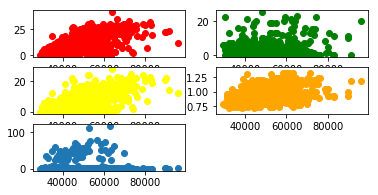

In [39]:


#Create scatterplots,

plt.subplot(4, 2, 1)
plt.scatter(x = df["salary"], y =  df["yearsworked"], c = "red")

plt.subplot(4, 2, 2)
plt.scatter(x = df["salary"], y =  df["exprior"], c = "green")

plt.subplot(4, 2, 3)
plt.scatter(x = df["salary"], y =  df["yearsrank"], c="yellow")

plt.subplot(4, 2, 4)
plt.scatter(x = df["salary"], y =  df["market"], c ="orange")

plt.subplot(4, 2, 5)
plt.scatter(x = df["salary"], y =  df["yearsabs"])



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6b6167b38>,
      dtype=object)

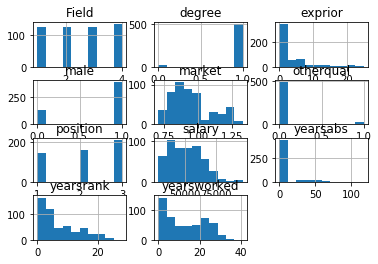

In [40]:
#Create histograms

df.hist()





In [12]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


Produce a correlation matrix comparing the relationship of salary to the predictor variables.

In [34]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


There is no multicollinearity

4. Run the multiple linear regression

In [75]:
feature_cols = ['yearsrank' , 'yearsworked' , 'market' , 'yearsabs']

X = X_train[feature_cols]
Y = y_train

lm2 = LinearRegression()
lm2.fit( X, Y)

print(lm2.intercept_)
print(lm2.coef_)
list(zip(feature_cols, lm2.coef_))


4218.553847378869
[  409.96633999   678.2598969  36705.85960891   -38.64752142]


[('yearsrank', 409.96633998583695),
 ('yearsworked', 678.2598968950401),
 ('market', 36705.85960890832),
 ('yearsabs', -38.647521421072696)]